In [6]:
from mtress import Location, MetaModel
from mtress.carriers import Heat, Electricity, Hydrogen
from mtress.technologies import AirHeatExchanger, HeatPump
from mtress._meta_model import SolphModel # TODO: clean up import
from mtress._helpers._visualization import generate_graph

In [7]:
location = Location("SFH")

# Add carriers
heat_carrier = Heat([30,40], 0)
electricity_carrier = Electricity()

h2_carrier = Hydrogen([30, 350, 700])

location.add_carrier(heat_carrier)
location.add_carrier(electricity_carrier)
location.add_carrier(h2_carrier)

# Add technologies
air_heat_exchanger = AirHeatExchanger("air_heat_exchanger1", air_temperatures=15., nominal_power=10)
heat_pump = HeatPump("hp0")

location.add_technology(air_heat_exchanger)
location.add_technology(heat_pump)

# Generate metamodel with one location
meta_model = MetaModel()
meta_model.add_location(location)

In [8]:
solph_model = SolphModel(meta_model=meta_model, timeindex={"start": "2010-01-01", "end": "2010-02-01", "freq":"d"})
solph_model.build_solph_energy_system()

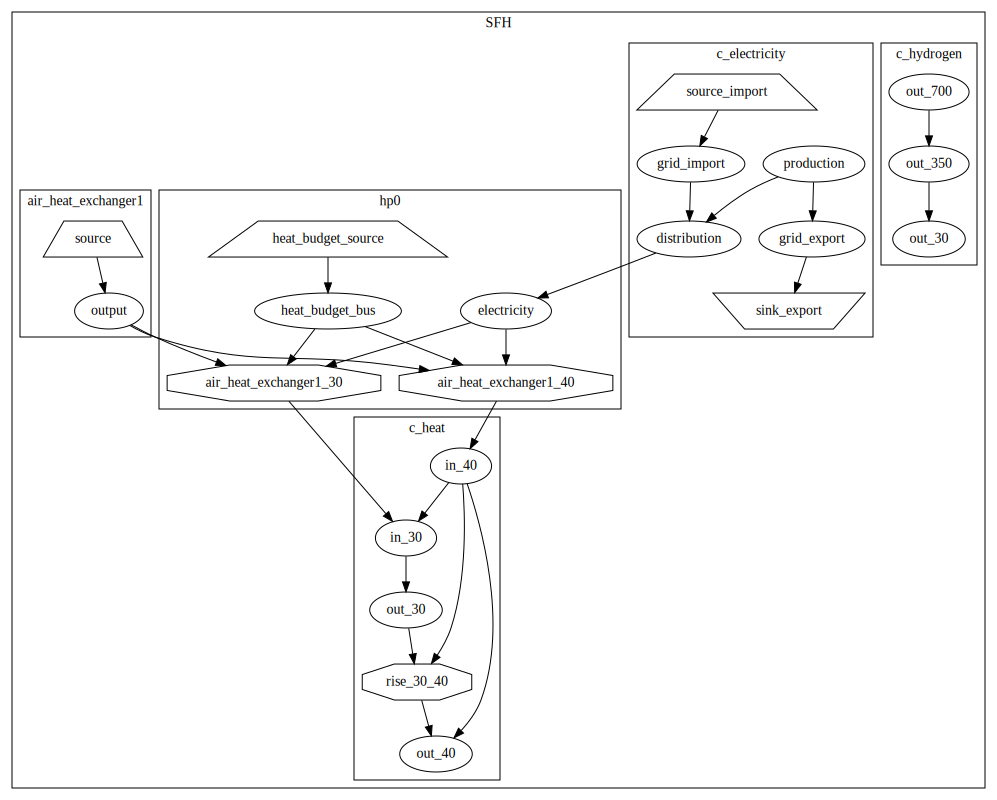

In [9]:
generate_graph(solph_model.energy_system)